# 01/28 Ballmer-${\gamma}$ spectra acquisiton
Control both the stepping motor and the camera from this notebook.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from lab_control.spectrometer import thr640

In [3]:
from FLI import FLI
import numpy as np
import time
import logging
import csv
import xarray as xr
from os.path import join

In [4]:
# logger
logger = thr640.logger
camera = FLI()
step_motor = thr640.THR640()

In [5]:
count=635000 # バルマーγ
step_motor.goto(count)
step_motor.waitUntilReady()

2021-02-16 15:49:22,393:INFO:getting status...
2021-02-16 15:49:29,269:INFO:Move to +635000
2021-02-16 15:49:29,373:INFO:getting status...
2021-02-16 15:49:35,409:INFO:getting status...
2021-02-16 15:49:42,393:INFO:getting status...
2021-02-16 15:49:49,388:INFO:getting status...


### 1回目

<Figure size 432x288 with 0 Axes>

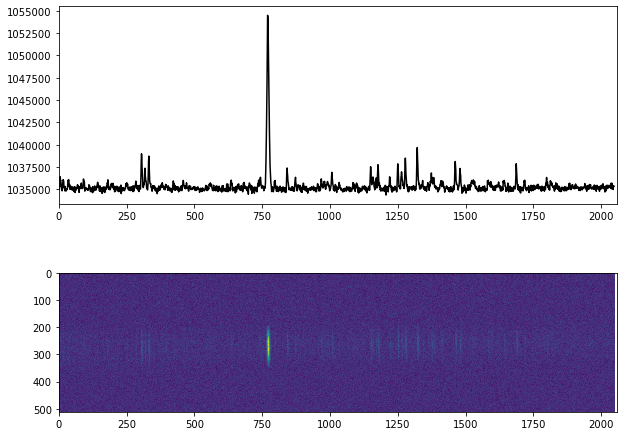

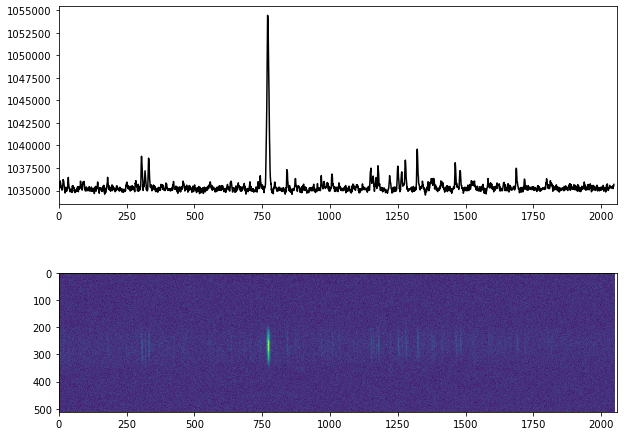

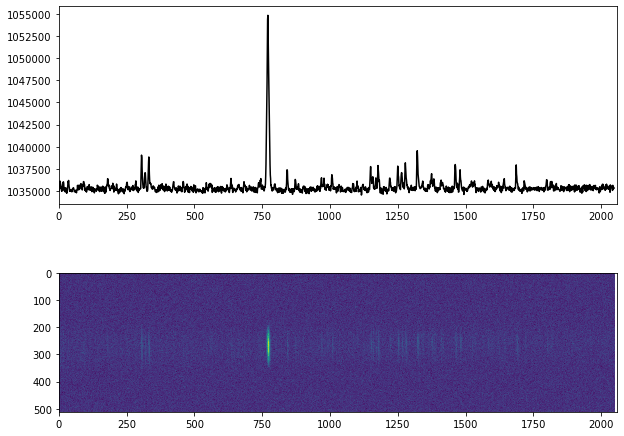

In [9]:
for i in range(3): # i = 0,1,2
    
    %run imaging_tool.py
    exposure = 1 * 1e3 # ms
    vbin = 1
    attributes = {
        "temperature": camera.getTemperature(),
        "device_status": camera.getDeviceStatus(),
        "exposure": exposure,
        "frame_type": "light",
    }
    
    camera.setExposureTime(exposure)
    camera.setVBin(vbin)
    camera.setImageArea(10,0,2058,512//vbin)
    time.sleep(.5)
    camera.exposeFrame()
    time.sleep(.1)
    # load image
    image_data = camera.grabFrame(out=np.empty((512//vbin,2048), np.uint16))
    # convert to xarray
    data = xr.DataArray(
        image_data, dims=["y", "x"], coords={"image_counter": 0}, attrs=attributes
    )
    
    filepath = f'Plasma_635000r_1000ms_0.5A_1_{i+1}.nc'
#    filepath = f'Calib_635000r_1000ms_{i+1}.nc'
#    filepath = f'lamp_635000r_1000ms_{i+1}.nc'
    filepath = join(r'\\10.249.254.51\Public\Kuzmin\Experiments-Leprecon\Spectrometer\20210216_yun\Duterium_plasma\Step',filepath)
#    filepath = join(r'\\10.249.254.51\Public\Kuzmin\Experiments-Leprecon\Spectrometer\20210216_yun\Calib',filepath)
#    filepath = join(r'\\10.249.254.51\Public\Kuzmin\Experiments-Leprecon\Spectrometer\20210129_yun\Lamp',filepath)

    data.to_netcdf(filepath)
    plot_image(image_data)
    

### 2回目

In [6]:
for i in range(3): # i = 0,1,2
    
    %run imaging_tool.py
    exposure = 1 * 1e3 # ms
    vbin = 1
    attributes = {
        "temperature": camera.getTemperature(),
        "device_status": camera.getDeviceStatus(),
        "exposure": exposure,
        "frame_type": "light",
    }
    
    camera.setExposureTime(exposure)
    camera.setVBin(vbin)
    camera.setImageArea(10,0,2058,512//vbin)
    time.sleep(.5)
    camera.exposeFrame()
    time.sleep(.1)
    # load image
    image_data = camera.grabFrame(out=np.empty((512//vbin,2048), np.uint16))
    # convert to xarray
    data = xr.DataArray(
        image_data, dims=["y", "x"], coords={"image_counter": 0}, attrs=attributes
    )
    
    filepath = f'Plasma_635000r_1000ms_2.5_2_{i+1}.nc'
#    filepath = f'Calib_635000r_1000ms_2_{i+1}.nc'
#    filepath = join(r'\\10.249.254.51\Public\Kuzmin\Experiments-Leprecon\Spectrometer\20210216 _yun\Hydrogen_plasma',filepath)
    filepath = join(r'\\10.249.254.51\Public\Kuzmin\Experiments-Leprecon\Spectrometer\20210216_yun\Duterium_plasma',filepath)
#    filepath = join(r'\\10.249.254.51\Public\Kuzmin\Experiments-Leprecon\Spectrometer\20210128_yun\Calib',filepath)
    data.to_netcdf(filepath)
    plot_image(image_data)

PermissionError: [Errno 13] Permission denied: b'\\\\10.249.254.51\\Public\\Kuzmin\\Experiments-Leprecon\\Spectrometer\\20210216 _yun\\Duterium_plasma\\Plasma_635000r_1000ms_2_1.nc'

### bg

<Figure size 432x288 with 0 Axes>

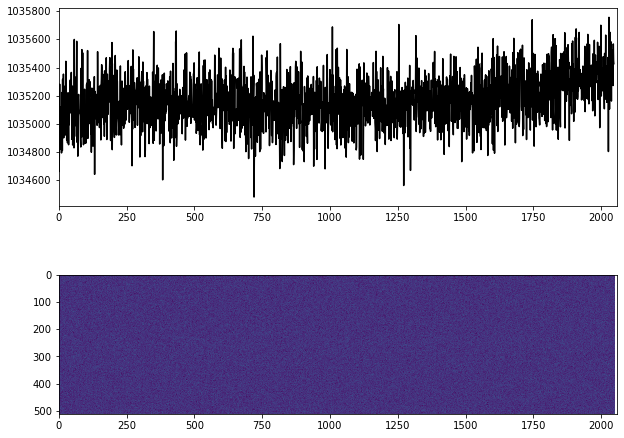

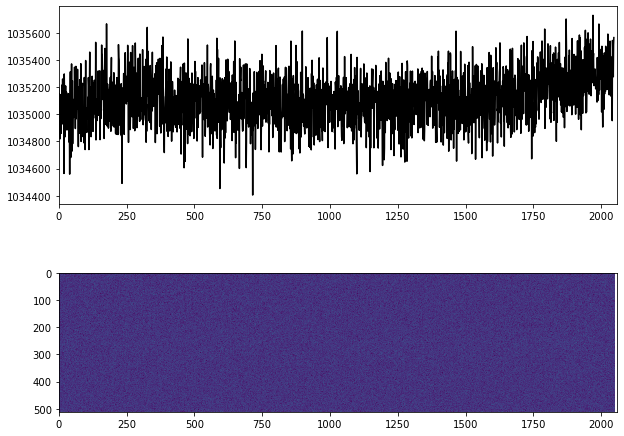

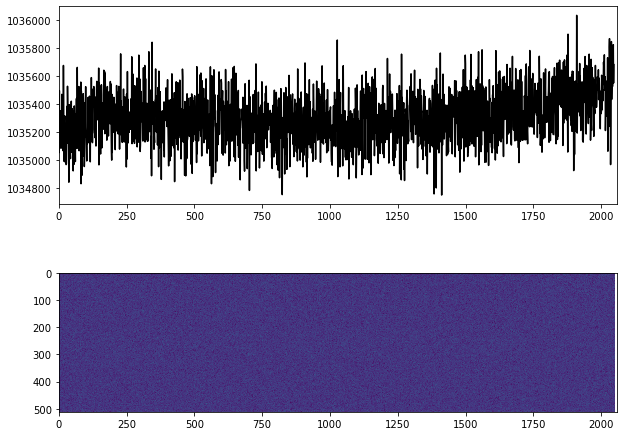

In [8]:
for i in range(3): # i = 0,1,2
    
    %run imaging_tool.py
    exposure = 1 * 1e3 # ms
    vbin = 1
    attributes = {
        "temperature": camera.getTemperature(),
        "device_status": camera.getDeviceStatus(),
        "exposure": exposure,
        "frame_type": "light",
    }
    
    camera.setExposureTime(exposure)
    camera.setVBin(vbin)
    camera.setImageArea(10,0,2058,512//vbin)
    time.sleep(.5)
    camera.exposeFrame()
    time.sleep(.1)
    # load image
    image_data = camera.grabFrame(out=np.empty((512//vbin,2048), np.uint16))
    # convert to xarray
    data = xr.DataArray(
        image_data, dims=["y", "x"], coords={"image_counter": 0}, attrs=attributes
    )
    
    filepath = f'Plasma_635000r_1000ms_bg_{i+1}.nc'
#    filepath = f'Calib_635000r_1000ms_bg_{i+1}.nc'
    filepath = join(r'\\10.249.254.51\Public\Kuzmin\Experiments-Leprecon\Spectrometer\20210216_yun\Duterium_plasma',filepath)
#    filepath = join(r'\\10.249.254.51\Public\Kuzmin\Experiments-Leprecon\Spectrometer\20210216_yun\Hydrogen_plasma',filepath)
#    filepath = join(r'\\10.249.254.51\Public\Kuzmin\Experiments-Leprecon\Spectrometer\20210128_yun\Calib',filepath)
    data.to_netcdf(filepath)
    plot_image(image_data)